In [1]:
# Import libarieries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Election_Data.csv to Election_Data (3).csv


# EDA

In [3]:
# Read the data
df = pd.read_csv('Election_Data.csv')
display(df.head())
display(df.shape)

,TimeElapsed,time,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,nullVotesPercentage,votersPercentage,subscribedVoters,totalVoters,pre.blankVotes,pre.blankVotesPercentage,pre.nullVotes,pre.nullVotesPercentage,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates
0,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,2.3,51.36,752529,386497,8317,1.94,8171,1.91,52.66,813743,428546,PS,0,38.29,40.22,147993,94,106
1,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,2.3,51.36,752529,386497,8317,1.94,8171,1.91,52.66,813743,428546,PPD/PSD,0,33.28,34.95,128624,81,77
2,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,2.3,51.36,752529,386497,8317,1.94,8171,1.91,52.66,813743,428546,B.E.,0,6.81,7.15,26307,16,19
3,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,2.3,51.36,752529,386497,8317,1.94,8171,1.91,52.66,813743,428546,CDS-PP,0,4.90,5.14,18923,12,5
4,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,2.3,51.36,752529,386497,8317,1.94,8171,1.91,52.66,813743,428546,PCP-PEV,0,4.59,4.83,17757,11,12


(21643, 28)

In [4]:
# Check the missing values
df.isnull()

,TimeElapsed,time,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,nullVotesPercentage,votersPercentage,subscribedVoters,totalVoters,pre.blankVotes,pre.blankVotesPercentage,pre.nullVotes,pre.nullVotesPercentage,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21638,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
21639,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
21640,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
21641,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


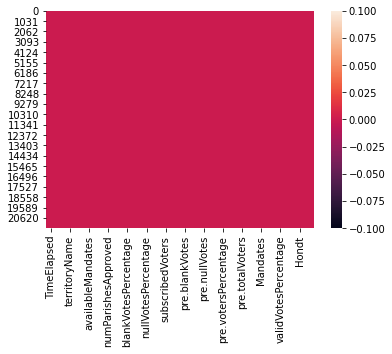

In [5]:
# Visulalize the missing values in dataset 
sns.heatmap(df.isnull())

'''No missing values are present in data set '''

In [6]:
# Check the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21643 entries, 0 to 21642
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   TimeElapsed               21643 non-null  int64  
 1   time                      21643 non-null  object 
 2   territoryName             21643 non-null  object 
 3   totalMandates             21643 non-null  int64  
 4   availableMandates         21643 non-null  int64  
 5   numParishes               21643 non-null  int64  
 6   numParishesApproved       21643 non-null  int64  
 7   blankVotes                21643 non-null  int64  
 8   blankVotesPercentage      21643 non-null  float64
 9   nullVotes                 21643 non-null  int64  
 10  nullVotesPercentage       21643 non-null  float64
 11  votersPercentage          21643 non-null  float64
 12  subscribedVoters          21643 non-null  int64  
 13  totalVoters               21643 non-null  int64  
 14  pre.bl

In [7]:
# Check the uniqueness
df.nunique()

TimeElapsed                   54
time                          54
territoryName                 21
totalMandates                 62
availableMandates             69
numParishes                   20
numParishesApproved          219
blankVotes                   329
blankVotesPercentage         146
nullVotes                    331
nullVotesPercentage          107
votersPercentage             282
subscribedVoters             335
totalVoters                  336
pre.blankVotes               323
pre.blankVotesPercentage     130
pre.nullVotes                329
pre.nullVotesPercentage       90
pre.votersPercentage         278
pre.subscribedVoters         331
pre.totalVoters              331
Party                         21
Mandates                      67
Percentage                  1363
validVotesPercentage        1387
Votes                       4029
Hondt                         41
FinalMandates                 17
dtype: int64

In [8]:
# Summary statistics
df.describe()

,TimeElapsed,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,nullVotesPercentage,votersPercentage,subscribedVoters,totalVoters,pre.blankVotes,pre.blankVotesPercentage,pre.nullVotes,pre.nullVotesPercentage,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates
count,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,2.164300e+04,2.164300e+04,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,2.164300e+04,2.164300e+04,21643.000000,21643.000000,21643.000000,2.164300e+04,21643.000000,21643.000000
mean,133.146052,11.544795,11.499284,309.956013,261.090237,8875.066673,2.621629,6148.068752,1.961471,51.983722,6.275367e+05,3.390741e+05,7608.001386,2.071985,5914.629950,1.777442,54.549372,6.378503e+05,3.594932e+05,0.565495,4.968484,5.207232,1.585209e+04,1.126138,1.126138
std,77.651193,31.314567,31.738783,659.055911,583.377428,21484.874088,0.795289,14735.469269,0.375250,4.854380,1.525590e+06,8.290404e+05,18493.107257,0.518025,14236.038023,0.388798,4.964948,1.544418e+06,8.763729e+05,4.421804,10.379967,10.881108,9.310605e+04,6.293552,6.872644
min,0.000000,0.000000,0.000000,54.000000,3.000000,19.000000,0.530000,39.000000,1.340000,35.980000,5.767000e+03,2.833000e+03,32.000000,0.800000,40.000000,1.140000,40.870000,6.383000e+03,3.215000e+03,0.000000,0.020000,0.020000,1.000000e+00,0.000000,0.000000
25%,65.000000,1.000000,0.000000,75.000000,67.000000,1188.000000,2.230000,1094.000000,1.720000,50.290000,1.229870e+05,6.267100e+04,1130.000000,1.740000,1124.000000,1.520000,51.210000,1.289260e+05,6.964400e+04,0.000000,0.220000,0.230000,2.360000e+02,0.000000,0.000000
50%,135.000000,4.000000,3.000000,147.000000,120.000000,2998.000000,2.640000,2232.000000,1.870000,53.130000,2.289540e+05,1.060120e+05,2595.000000,2.030000,2141.000000,1.690000,56.260000,2.284970e+05,1.102730e+05,0.000000,0.620000,0.650000,7.900000e+02,0.000000,0.000000
75%,200.000000,9.000000,9.000000,242.000000,208.000000,6889.000000,2.980000,4121.000000,2.230000,54.550000,3.804890e+05,2.069180e+05,5929.000000,2.370000,3967.000000,1.970000,58.220000,3.933140e+05,2.276200e+05,0.000000,3.010000,3.160000,4.510000e+03,0.000000,0.000000
max,265.000000,226.000000,226.000000,3092.000000,3092.000000,129599.000000,5.460000,88539.000000,3.350000,59.870000,9.343084e+06,5.092424e+06,112666.000000,3.660000,86473.000000,3.120000,62.580000,9.439701e+06,5.380451e+06,106.000000,49.110000,51.420000,1.866407e+06,94.000000,106.000000


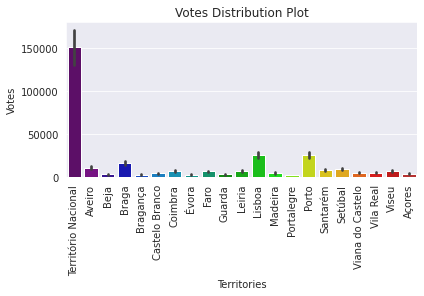

In [9]:
# Dropping the TimeElapsed & the Time columns
df = df.drop(['TimeElapsed','time'], axis = 1)

# 1) Data Density Distribution Plots of Territory vs Voters
d = df[df['Votes'] > 175000].sort_values('Votes', ascending=False)
d = d.sample(frac = 1).reset_index(drop = True)
d = d.head(30)

plt.Figure(figsize = (20, 16))
sns.set_style('darkgrid')

p = sns.barplot(y = df['Votes'], x = df['territoryName'], data = df, palette = 'nipy_spectral')

plt.ylabel('Votes')
plt.xlabel('Territories')
plt.xticks(rotation=90)
plt.tight_layout()

plt.title('Votes Distribution Plot')
plt.show()

# ENCODING

In [10]:
# Shuffling the dataframe
df = df.sample(frac = 1).reset_index(drop = True)

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Encoding the territory column
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

lbl = LabelEncoder()

X[:, 0] = lbl.fit_transform(X[:, 0])
X[:, -6] = lbl.fit_transform(X[:, -6])

ct = ColumnTransformer(transformers = [('one_hot_encoder', OneHotEncoder(categories = 'auto'), [0, -6])],
                       remainder = 'passthrough')

X = ct.fit_transform(X)

X = X[:, 1:]

### Spliting Train and Test for Machine Learning Models 

In [11]:
# Splitting into training & testing datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# **LINEAR REGRESSION**

In [12]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model
max_r_score = 0
for r_state in range(42,100):
    X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = r_state,test_size = 0.20)
    regr = linear_model.LinearRegression()
    regr.fit(X_train,y_train)
    y_pred = regr.predict(X_test)
    r2_scr = r2_score(y_test,y_pred)
    if r2_scr>max_r_score:
        max_r_score = r2_scr
        final_r_state = r_state 
print("max r2 score coressponding to",final_r_state,"is",max_r_score)

max r2 score coressponding to 91 is 0.9947374458961362


# Cross Validaton

In [13]:
from sklearn.model_selection import cross_val_score
cross_val_score(linear_model.LinearRegression(),X,y,cv=10,scoring = "r2").mean()

0.9928618765529565

In [25]:
#max r2 score is 91
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 91,test_size=0.20)
lreg = linear_model.LinearRegression()
lreg.fit(X_train,y_train)
y_pred = lreg.predict(X_test)

In [26]:
# Test Prediction 
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("r2 score is : ",r2_score(y_test,y_pred))
print("RMSE is :",np.sqrt(mean_squared_error(y_test,y_pred)))

r2 score is :  0.9947374458961362
RMSE is : 0.5405639744298114


## DECISION TREE REGRESSOR

In [27]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 91)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=91, splitter='best')

In [28]:
# Predictions
y_pred = regressor.predict(X_test)

In [29]:
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
r2_score = r2_score(y_test, y_pred)
explained_variance_score = explained_variance_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("\nMean Squared Error: ", mse)
print("\nR2 Score: ", r2_score)
print("\nExplained Variance Score: ", explained_variance_score)


Mean Squared Error:  0.001155001155001155

R2 Score:  0.9999791989722069

Explained Variance Score:  0.9999792076212829


## **RANDOM FOREST REGRESSOR**

In [30]:
#Build random forest using RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators = 500, random_state = 91).fit(X_train,y_train)

#Perdict for test cases
rf_predictions = rf_model.predict(X_test)

#Create data frame for actual and predicted values
df_rf = pd.DataFrame({'actual': y_test, 'pred': rf_predictions})
print(df_rf.head())

#Define function to calculate RMSE
def RMSE(y_actual,y_predicted):
    rmse = np.sqrt(mean_squared_error(y_actual,y_predicted))
    return rmse

#Calculate RMSE and R-squared value
print("RMSE is :",np.sqrt(mean_squared_error(y_test, rf_predictions)))
print("\nR2 Score: ", r2_score)

   actual  pred
0       0   0.0
1       0   0.0
2       1   1.0
3       0   0.0
4       2   2.0
RMSE is : 0.03860981075733844

R2 Score:  0.9999791989722069


# **CONCLUSION**

After doing Analysis it is clear  that Random Forest Regressor is best because R2 score is 99% and RMSE is 0.3 comparing to other models.

In [31]:
# Save the model
import joblib
joblib.dump(rf_model,'election.pkl')

['election.pkl']